## Task4: Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

In [2]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_csv('twitter_training.csv')

# Rename the columns for easier reference
df.columns = ['id', 'topic', 'sentiment', 'text']

In [6]:
df.head()

,id,topic,sentiment,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


## Data Preprocessing

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         74681 non-null  int64 
 1   topic      74681 non-null  object
 2   sentiment  74681 non-null  object
 3   text       73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [11]:
df.isnull().sum()

id             0
topic          0
sentiment      0
text         686
dtype: int64

In [10]:
df.shape

(74681, 4)

In [14]:
df.dropna(inplace = True)

In [17]:
df.isnull().sum()

id           0
topic        0
sentiment    0
text         0
dtype: int64

## Visualization

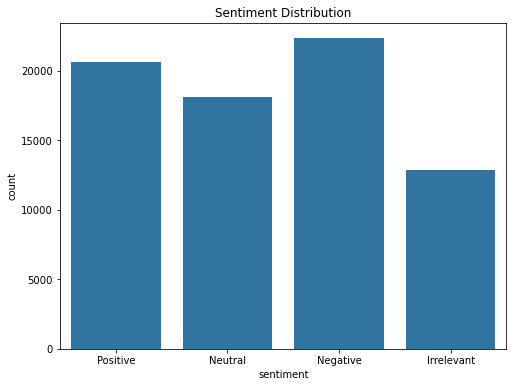

In [18]:
# Sentiment distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()

## Sentiment Analysis

In [20]:
# Import necessary libraries for sentiment analysis
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score

In [21]:
# Preprocess the text data
df['text_clean'] = df['text'].str.replace('[^\w\s]', '').str.lower()

/var/folders/mh/vq9sbyf90916w8fzlwkc0g240000gn/T/ipykernel_86689/3935145495.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text_clean'] = df['text'].str.replace('[^\w\s]', '').str.lower()


In [22]:
# Split the data into training and testing sets
X = df['text_clean']
y = df['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [24]:
# Train a Naive Bayes classifier
model = MultinomialNB()
model.fit(X_train_vect, y_train)

MultinomialNB()

In [26]:
# Make predictions
y_pred = model.predict(X_test_vect)

In [27]:
# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred):.4f}')
print(classification_report(y_test, y_pred))

Accuracy: 0.7471
              precision    recall  f1-score   support

  Irrelevant       0.84      0.61      0.70      2624
    Negative       0.70      0.86      0.77      4463
     Neutral       0.83      0.62      0.71      3589
    Positive       0.72      0.82      0.77      4123

    accuracy                           0.75     14799
   macro avg       0.77      0.73      0.74     14799
weighted avg       0.76      0.75      0.74     14799

